In [56]:
# Load pickled data
import pickle

training_file = 'train.p'
validation_file= 'valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
    
X_train_init, y_train_init = train['features'], train['labels']

In [57]:
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2

%matplotlib inline


# Image Operations

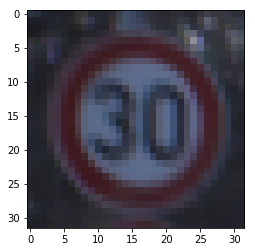

In [72]:
#index = random.randint(0, len(X_train_init))

image = X_train_init[index]
plt.imshow(image)

plt.imsave('examples/limit30.png', image)

In [30]:
def rotation(img, max_angle):
    # Rotation between -max_angle and max_angle degrees    
    angle = random.randint(-max_angle, max_angle)
    
    rows, cols,ch = img.shape
    M = cv2.getRotationMatrix2D((cols/2,rows/2),angle,1)
    
    return(cv2.warpAffine(img,M,(cols,rows)))


def perspective(img):
    rows,cols,ch = img.shape
    
    small1 = random.randint(0, 8)
    small2 = random.randint(0, 8)
    big1 = random.randint(24, 32)
    big2 = random.randint(24, 32)
    
    pts1 = np.float32([[small1,small2],[big1,small1],[small2,big2],[big1,big2]])
    pts2 = np.float32([[small2,small1],[big2,small2],[small1,big1],[big2,big1]])
    
    M = cv2.getPerspectiveTransform(pts1,pts2)
    
    return(cv2.warpPerspective(img,M,(32,32)))  


def affine_transform(img):
    
    rows,cols,ch = img.shape
    
    small1 = random.randint(0, 6)
    small2 = random.randint(0, 6)
    big1 = random.randint(26, 32)
    big2 = random.randint(26, 32)
    
    pts1 = np.float32([[small1,small1],[big1,small2],[small1,big1]])
    pts2 = np.float32([[small2,small2],[big2,small1],[small2,big2]])
    M = cv2.getAffineTransform(pts1,pts2)
    return(cv2.warpAffine(img,M,(cols,rows)))


def random_transform(img):
    
    result = np.copy(img)
    max_angle = 20
    
    if(random.randint(0, 1)):
        # Rotation of the image
        result = rotation(img, max_angle)

    if(random.randint(0, 1)):
        # Perspective Transformation of the image
        result = perspective(img)

    if(random.randint(0, 1)):
        # Affine Transformation of the image
        result = affine_transform(img)
    
    
    return result

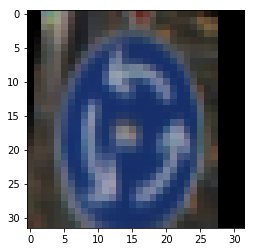

In [31]:
image2 = random_transform(image)
plt.imshow(image2)

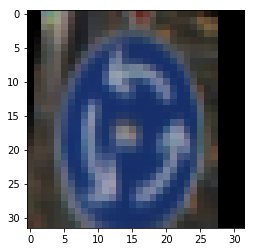

In [32]:
plt.imshow(image2)

In [33]:
image3 = perspective(image)

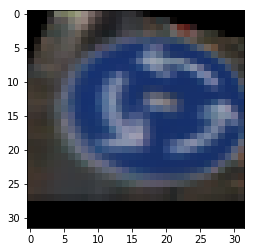

In [34]:
plt.imshow(image3)

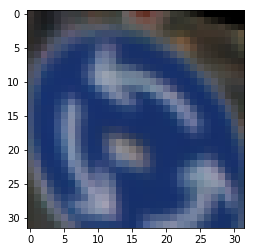

In [35]:
image4 = affine_transform(image)
plt.imshow(image4)

# Ordering the dataset by image class

In [36]:
import pandas as pd

In [37]:
count = pd.value_counts(y_train_init).sort_index()

list_signals = pd.read_csv('signnames.csv')

result = pd.DataFrame()
result['SignIndex'] = count.index
result['Counts'] = count.values
result['Signal'] = list_signals['SignName'][count.index]

result = result.sort_values(by=['Counts'], ascending=True)
result = result.reset_index(drop=True)

result.head(n=43)

,SignIndex,Counts,Signal
0,0,180,Speed limit (20km/h)
1,37,180,Go straight or left
2,19,180,Dangerous curve to the left
3,32,210,End of all speed and passing limits
4,27,210,Pedestrians
5,41,210,End of no passing
6,42,210,End of no passing by vehicles over 3.5 metric ...
7,24,240,Road narrows on the right
8,29,240,Bicycles crossing
9,39,270,Keep left


In [38]:
mean_count = result['Counts'].mean()

# Normalizing

In [60]:
X_norm = np.array(X_train_init, dtype=np.float, copy=True)

In [61]:
channels = X_norm.shape[3]

In [62]:
# Inspect whether the data is centered
print("Mean of the dataset before preprocessing: [{:.3f}, {:.3f}, {:.3f}]".\
      format(X_norm[...,0].mean(),X_norm[...,1].mean(),X_norm[...,2].mean()))

print()

print("Deviation of the dataset before preprocessing: [{:.3f}, {:.3f}, {:.3f}]".\
      format(X_norm[...,0].std(),X_norm[...,1].std(),X_norm[...,2].std()))

Mean of the dataset before preprocessing: [86.698, 79.496, 81.839]

Deviation of the dataset before preprocessing: [69.284, 66.270, 67.766]


In [63]:
for ch in range(channels):
    X_norm[...,ch] = (X_norm[...,ch] - X_norm[...,ch].mean()) / X_norm[...,ch].std()

In [64]:
# Now, print the mean and deviation of the dataset after preprocessing
print("Mean of the dataset after preprocessing: [{:.3f}, {:.3f}, {:.3f}]".\
      format(X_norm[...,0].mean(),X_norm[...,1].mean(),X_norm[...,2].mean()))

print()

print("Deviation of the dataset after preprocessing: [{:.3f}, {:.3f}, {:.3f}]".\
      format(X_norm[...,0].std(),X_norm[...,1].std(),X_norm[...,2].std()))

Mean of the dataset after preprocessing: [-0.000, -0.000, -0.000]

Deviation of the dataset after preprocessing: [1.000, 1.000, 1.000]


In [74]:
plt.imsave('examples/limit30_norm.png', X_norm[index])


In [76]:
def show2img(orig_img, proc_img):
    plt.figure(figsize=(6, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(orig_img)
    plt.title("Original image")
    plt.subplot(1, 2, 2)
    plt.imshow(proc_img)
    plt.title("Normalized image")
    plt.show() 

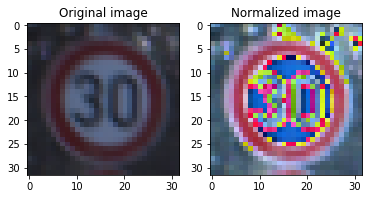

In [77]:
show2img(image, X_norm[index])

In [ ]:
tra

In [45]:
len(X_norm)

34799

# Image insertion

In [47]:
X_try = np.empty_like(X_norm)

In [48]:
print(X_norm.shape)

(34799, 32, 32, 3)


In [49]:
print(X_try.shape)

(34799, 32, 32, 3)


In [51]:
image.shape

(32, 32, 3)

In [52]:
image_array = []

In [53]:
image_array.append(image)

In [55]:
np.asarray(image_array).shape

(1, 32, 32, 3)